In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

import pickle
import warnings

warnings.filterwarnings("ignore")

# Functions for reading and writing a pickel file

In [4]:
# Save the object in pickel file
def save_obj(path, obj, name):
    with open(path + '/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# Read the object from pickel file
def load_obj(path, name):
    with open(path + '/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Load the data

In [115]:
path = './data'

X = load_obj(path, 'train_image')
y = load_obj(path, 'train_label')

test = load_obj(path, 'test_image')
test = np.array(test)

# Convert the data into numpy array

In [116]:
# Lests identify the dtype of data before doing any preprocessing.
print('dtype of X before conversion:', type(X))
print('dtype of y before conversion:', type(y), end='\n\n')

# Conversion into numpy array is done to make the computation faster.
X = np.array(X)
y = np.array(y)

# Printing of shape is done to see if the row count in both data and labels do not mismatch.
print('Shape of data:', X.shape)
print('Shape of labels:', y.shape, end='\n\n')

print('Number of distinct labels:', np.unique(y), end='\n\n')

# Max and min value across row in X
print('Maximum value across row:', np.max(X[0, :]))
print('Minimum value across row:', np.min(X[0, :]))

# Conclusion: it looks row represnts images

dtype of X before conversion: <class 'list'>
dtype of y before conversion: <class 'list'>

Shape of data: (8000, 784)
Shape of labels: (8000,)

Number of distinct labels: [0 2 3 6]

Maximum value across row: 255
Minimum value across row: 0


In [47]:
def get_index_list_for_each_class(_1d):
    output = {}
    uniques = np.unique(_1d)
    for i in uniques:
        output[i] = [j for j in range(len(_1d)) if _1d[j] == i]
        
    return output

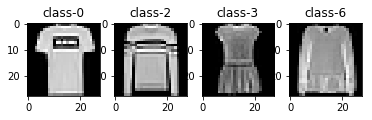

In [48]:
classwise_idx_list = get_index_list_for_each_class(y)

img_class_1 = X[classwise_idx_list[0][0], :].reshape((28, 28))
img_class_2 = X[classwise_idx_list[2][0], :].reshape((28, 28))
img_class_3 = X[classwise_idx_list[3][0], :].reshape((28, 28))
img_class_4 = X[classwise_idx_list[6][0], :].reshape((28, 28))

plt.subplot(141)
plt.title('class-0')
plt.imshow(img_class_1, cmap='gray')

plt.subplot(142)
plt.title('class-2')
plt.imshow(img_class_2, cmap='gray')

plt.subplot(143)
plt.title('class-3')
plt.imshow(img_class_3, cmap='gray')

plt.subplot(144)
plt.title('class-6')
plt.imshow(img_class_4, cmap='gray')
plt.show()

# Data visualisation

In [49]:
def count_plot(X, y, column, title):
    ax = sns.countplot(x=column, data=X.assign(labels=np.array(y)))
    plt.title(title)
    plt.show()

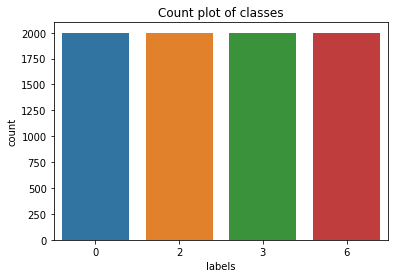

In [50]:
count_plot(pd.DataFrame(X), y, 'labels', 'Count plot of classes')

As it can be seen that the data is balanced over the classes.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [52]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape, end='\n\n')

print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape, end='\n\n')

Shape of X_train: (5600, 784)
Shape of y_train: (5600,)

Shape of X_test: (2400, 784)
Shape of y_test: (2400,)



# Dimensionality Reduction 

* PCA
* LDA
* LSA/ Truncated SVD

In [57]:
def reduce_dimension_by_pca(X_train, X_test, n_components):
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=n_components)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    print('Amount of eigen energy preserved:', np.sum(pca.explained_variance_ratio_))
    
    return X_train, X_test

In [69]:
X_train_pca, X_test_pca = reduce_dimension_by_pca(X_train, X_test, 2)

Amount of eigen energy preserved: 0.490809545935312


In [62]:
def reduce_dimension_by_lda(X_train, y_train, X_test, n_components):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    
    lda = LDA(n_components=n_components)
    
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    
    return X_train, X_test

In [82]:
X_train_lda, X_test_lda = reduce_dimension_by_lda(X_train, y_train, X_test, 2)

In [66]:
def reduce_dimension_by_lsa(X_train, X_test, n_components):
    from sklearn.decomposition import TruncatedSVD
    
    lsa = TruncatedSVD(n_components, algorithm = 'arpack')
    
    X_train = lsa.fit_transform(X_train)
    X_test = lsa.transform(X_test)
    
    return X_train, X_test

In [85]:
X_train_tsvd, X_test_tsvd = reduce_dimension_by_lsa(X_train.astype('float'), X_test.astype('float'), 2)

# Visualisation of data in Low dimension space

In the below plots n_componenets of each dimentionality reduction technique is 2

In [71]:
def scatter_plot(df, xlabel, ylabel, title):
    sns.lmplot( x=xlabel, y=ylabel, data=df, fit_reg=False, hue='label', legend=False, palette="Set2")
    plt.legend(loc='lower right')
    ax = plt.gca()
    ax.set_title(title)

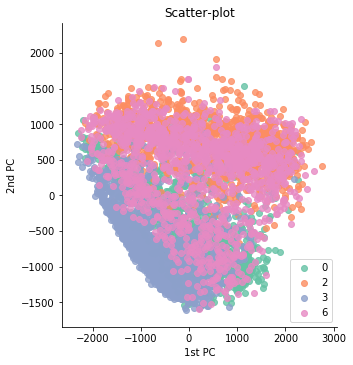

In [80]:
df = pd.DataFrame(X_train_pca, columns=['1st PC', '2nd PC'])
df = df.assign(label=np.array(y_train))
scatter_plot(df, '1st PC', '2nd PC', 'Scatter-plot')

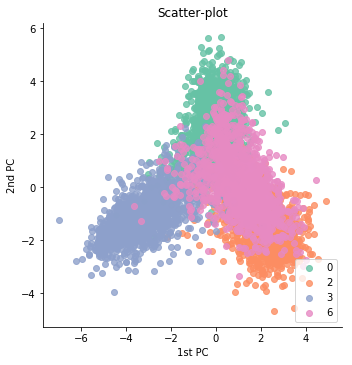

In [83]:
df = pd.DataFrame(X_train_lda, columns=['1st PC', '2nd PC'])
df = df.assign(label=np.array(y_train))
scatter_plot(df, '1st PC', '2nd PC', 'Scatter-plot')

On comparing with other 2 dimensionality reduction techniques we can say that the LDA is performing better in sperating class in lower dimensions.

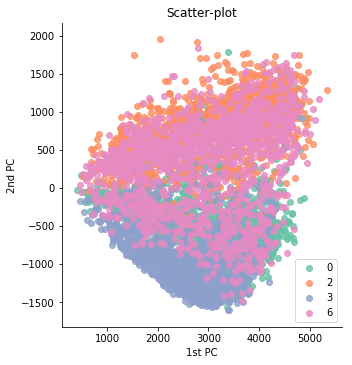

In [86]:
df = pd.DataFrame(X_train_tsvd, columns=['1st PC', '2nd PC'])
df = df.assign(label=np.array(y_train))
scatter_plot(df, '1st PC', '2nd PC', 'Scatter-plot')

# Applying different classification model

In [18]:
def train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_curve, auc
    from sklearn.metrics import classification_report
    from sklearn.metrics import log_loss
    
    ########################################### Training and Testing the classsifier ###########################################
    clf.fit(X_train, y_train)
    print('Classifier accuracy:', clf.score(X_test, y_test))
    
    #################################################### Confusion matrix ######################################################
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    
    ############################################################ ROC ###########################################################
    plt.subplot(122)
    labels = sorted(list(np.unique(y_test)))
    scores_for_all_class = clf.predict_proba(X_test)
    
    for i in range(len(labels)):
        scores = scores_for_all_class[:, i]
        fpr, tpr, _ = roc_curve(y_test, scores, pos_label=labels[i])
        plt.plot(fpr, tpr, label=labels[i])
    
    x = [0, 0.25, 0.5, 0.75, 1]
    plt.plot(x, x)
    
    plt.legend()
    plt.title("ROC")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid()
    plt.show()
    
    ############################################################ AUC ###########################################################
    print("AUC:", auc(fpr, tpr), end='\n\n')
    
    ################################################### Classification Report ##################################################
    print(classification_report(y_test, y_pred))
    
    print("Log-loss of classifier :", log_loss(y_test, scores_for_all_class))

# K Nearest Neighbour

Classifier accuracy: 0.7954166666666667


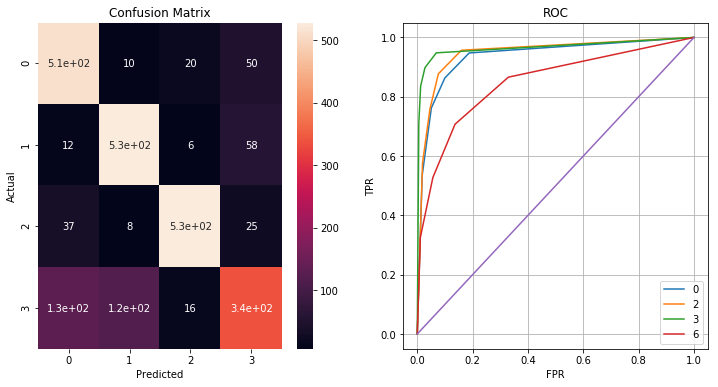

AUC: 0.8480913464858767

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       593
           2       0.80      0.87      0.83       604
           3       0.93      0.88      0.90       598
           6       0.72      0.56      0.63       605

   micro avg       0.80      0.80      0.80      2400
   macro avg       0.80      0.80      0.79      2400
weighted avg       0.80      0.80      0.79      2400

Log-loss of classifier : 2.694763974937549


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

tuned_parameter = {'n_neighbors':[1, 2, 3, 4, 5]}
clf = GridSearchCV(KNeighborsClassifier(),
                  tuned_parameter, scoring='accuracy', n_jobs=-1) 
# n_jobs means to use all possible available cores to parallise the algorithm

train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test)
print(clf.best_estimator_)

# Gaussian Naive Bayes

Classifier accuracy: 0.645


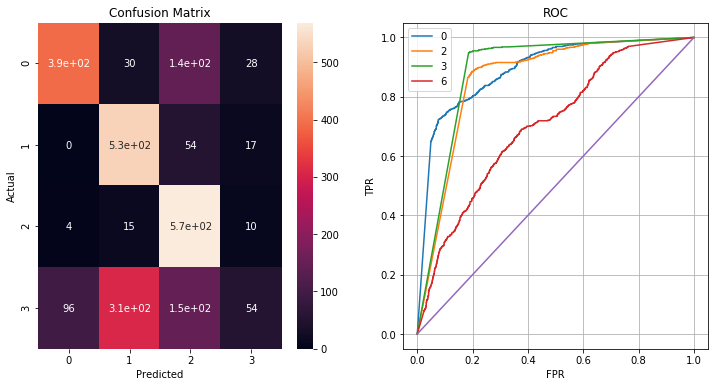

AUC: 0.7041460438776216

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       593
           2       0.60      0.88      0.72       604
           3       0.62      0.95      0.75       598
           6       0.50      0.09      0.15       605

   micro avg       0.65      0.65      0.65      2400
   macro avg       0.63      0.65      0.59      2400
weighted avg       0.63      0.65      0.58      2400

Log-loss of classifier : 11.96243458627842


In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test)

# Logistic Regression

Classifier accuracy: 0.78125


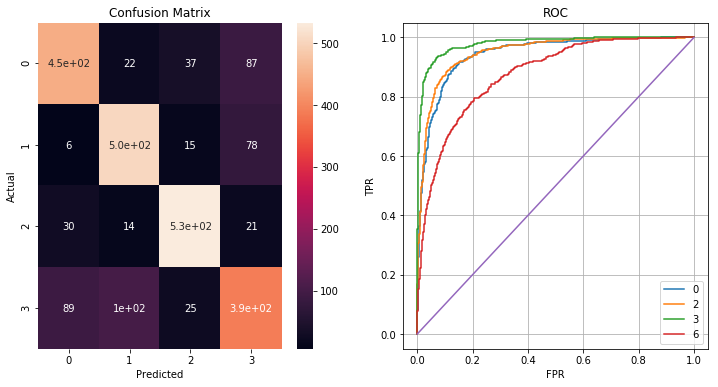

AUC: 0.8758240290982756

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       593
           2       0.79      0.84      0.81       604
           3       0.87      0.89      0.88       598
           6       0.68      0.64      0.66       605

   micro avg       0.78      0.78      0.78      2400
   macro avg       0.78      0.78      0.78      2400
weighted avg       0.78      0.78      0.78      2400

Log-loss of classifier : 0.6548167543759366


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# tuned_parameter = {'C':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
# clf = GridSearchCV(LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'),
#                   tuned_parameter, scoring='accuracy', n_jobs=-1)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', n_jobs=-1) 

train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test)

# Results of Support Vector machine

Classifier accuracy: 0.7291666666666666
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Text(0.5, 1.0, 'Confusion Matrix')

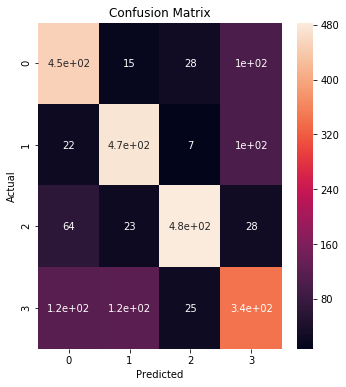

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Hperparameter tuning by GridSearch Algorithm
clf = GridSearchCV(SVC(), tuned_parameters, scoring='accuracy', n_jobs=-1)

clf.fit(X_train, y_train)
print('Classifier accuracy:', clf.score(X_test, y_test))

# Attributes of best hypertuned classifier
print(clf.best_estimator_)

plt.figure(figsize=(12, 6))
plt.subplot(121)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Note: The probailities are not used here by default in SVM. If we want to use probabilties then we can set it to true but 
# it will give only an approximate proabillities and also it will also increase runtime.

# Ensemble Learning

# Bagging of Logistic regressions

Classifier accuracy: 0.7879166666666667


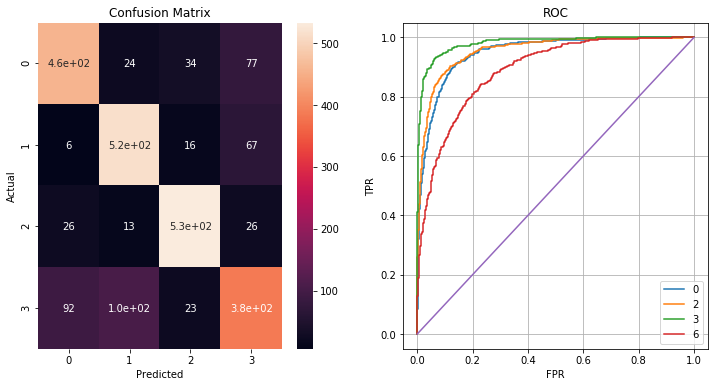

AUC: 0.8897064849559151

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       593
           2       0.78      0.85      0.82       604
           3       0.88      0.89      0.89       598
           6       0.69      0.64      0.66       605

   micro avg       0.79      0.79      0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400

Log-loss of classifier : 0.6039624496231998


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial') 
bg = BaggingClassifier(base_estimator=clf, n_estimators=100, n_jobs=-1)

train_the_classifier_and_analyse_the_test_results(bg, X_train, y_train, X_test, y_test)

# Results of Adaboost Classifier

Classifier accuracy: 0.7258333333333333


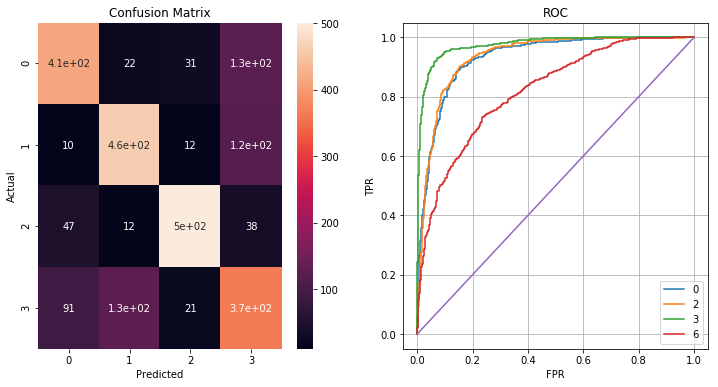

AUC: 0.8211036165657588

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       593
           2       0.74      0.76      0.75       604
           3       0.89      0.84      0.86       598
           6       0.56      0.60      0.58       605

   micro avg       0.73      0.73      0.73      2400
   macro avg       0.73      0.73      0.73      2400
weighted avg       0.73      0.73      0.73      2400

Log-loss of classifier : 1.2964922222628494


In [29]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier(clf, algorithm="SAMME", n_estimators=100)

train_the_classifier_and_analyse_the_test_results(bdt, X_train, y_train, X_test, y_test)

# Hyperparameter tuning of Random Forest Classifier

### Tuned Parameter:
* max_depth

Classifier accuracy: 0.8279166666666666


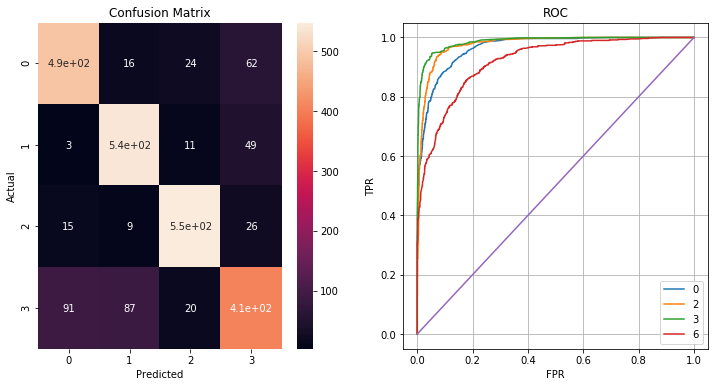

AUC: 0.9197232901309883

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       593
           2       0.83      0.90      0.86       604
           3       0.91      0.92      0.91       598
           6       0.75      0.67      0.71       605

   micro avg       0.83      0.83      0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400

Log-loss of classifier : 0.46459278125822806


In [45]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameter = {'max_depth':[20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 50]}
clf = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=0),
                  tuned_parameter, scoring='accuracy', n_jobs=-1)

train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test)
print(clf.best_estimator_)

In [46]:
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


# Results of Random Forest Classifier

Classifier accuracy: 0.8341666666666666


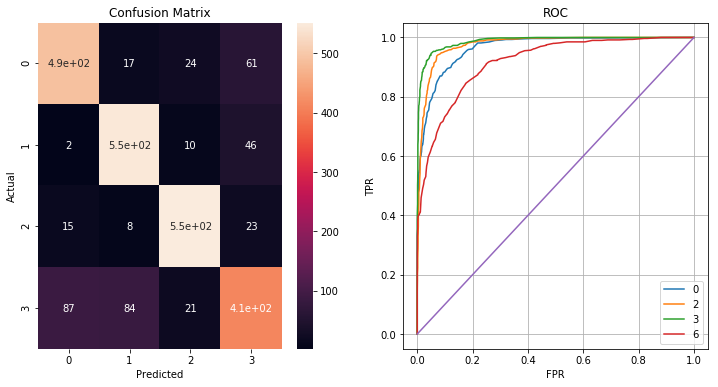

AUC: 0.9176693754460277

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       593
           2       0.83      0.90      0.87       604
           3       0.91      0.92      0.92       598
           6       0.76      0.68      0.72       605

   micro avg       0.83      0.83      0.83      2400
   macro avg       0.83      0.83      0.83      2400
weighted avg       0.83      0.83      0.83      2400

Log-loss of classifier : 0.4760700935043847


In [59]:
clf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=0, n_jobs=-1)

train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test)

SVM
Xgboost
stacking
Neural network
CNN

# Xgboost Classifier
* XGboost = GBDT + row-sampling + column-smapling
* By using the row-sampling and column-sampling XGboost is able to take best qualities of Random forest

Classifier accuracy: 0.83625


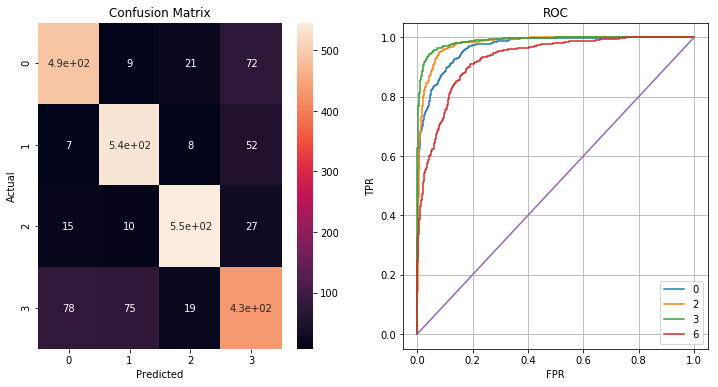

AUC: 0.9286189829415963

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       593
           2       0.85      0.89      0.87       604
           3       0.92      0.91      0.92       598
           6       0.74      0.72      0.73       605

   micro avg       0.84      0.84      0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400

Log-loss of classifier : 0.44196970375500866

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.3, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

tuned_parameter = {'max_depth':[1, 2, 3, 4],
                   'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
                   'n_estimators':[90, 100, 120] }
clf = GridSearchCV(XGBClassifier(n_jobs=-1),
                  tuned_parameter, scoring='accuracy', n_jobs=-1)

train_the_classifier_and_analyse_the_test_results(clf, X_train, y_train, X_test, y_test)

print('\n', clf.best_estimator_)

# I have not considered the learning rate = 1 because in GBDT with large number of estimators It is hihgly likly to overfit 
# the model.

# Multi-Layer Perceptron

Train on 5600 samples, validate on 2400 samples
Epoch 1/10
5600/5600 [==============================] - 1s 201us/step - loss: 0.7945 - acc: 0.6859 - val_loss: 0.6459 - val_acc: 0.7512
Epoch 2/10
5600/5600 [==============================] - 1s 147us/step - loss: 0.5566 - acc: 0.7850 - val_loss: 0.5677 - val_acc: 0.7792
Epoch 3/10
5600/5600 [==============================] - 1s 109us/step - loss: 0.4959 - acc: 0.8100 - val_loss: 0.5361 - val_acc: 0.7933
Epoch 4/10
5600/5600 [==============================] - 1s 102us/step - loss: 0.4579 - acc: 0.8275 - val_loss: 0.5397 - val_acc: 0.7950
Epoch 5/10
5600/5600 [==============================] - 1s 108us/step - loss: 0.4506 - acc: 0.8245 - val_loss: 0.5040 - val_acc: 0.8054
Epoch 6/10
5600/5600 [==============================] - 1s 110us/step - loss: 0.4227 - acc: 0.8350 - val_loss: 0.5107 - val_acc: 0.8042
Epoch 7/10
5600/5600 [==============================] - 1s 105us/step - loss: 0.3964 - acc: 0.8491 - val_loss: 0.4781 - val_acc: 0.8125


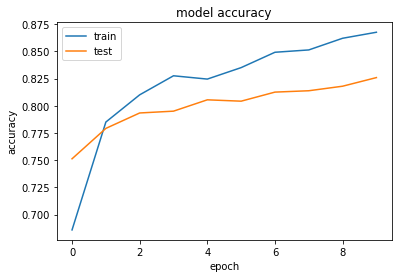

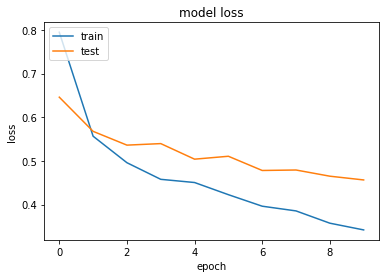

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_pixels = X_train.shape[1]
num_classes = y_test.shape[1]

# define model
def MLP_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = MLP_model()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

scores = model.evaluate(X_test, y_test, verbose=0)
print('MLP Error:', (100-scores[1]*100))

print(model.summary())

from matplotlib import pyplot as plt
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Final submission

In [119]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

clf = XGBClassifier(learning_rate=0.3, max_depth=4, n_jobs=-1)
clf.fit(X, y)

y_pred = clf.predict(test)

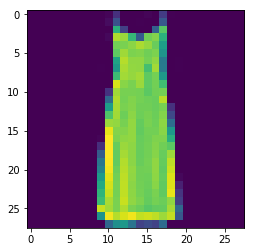

In [113]:
img = test[1000, :].reshape((28, 28))

plt.imshow(img)

In [102]:
# count = 0
# for i in range(len(y_test)):
#     if y_test[i] == y_pred[i]:
#         count += 1
# print(count/len(y_pred))

0.83625


In [120]:
np.unique(y_pred)

array([0, 2, 3, 6])

In [121]:
def put_res_to_csv(y_pred):
    import pandas as pd
    
    out = pd.DataFrame()
    out['image_index'] = [i for i in range(np.size(y_pred))]
    out['class'] = y_pred
    
    out.to_csv('Ankur_Pandey.csv', sep=',', index=False)

In [122]:
put_res_to_csv(y_pred)